### 제안 2: 지역별 만족도 차이 분석
- 문제 정의: 평균 만족도(avg_satisfaction)와 표준 편차(std_satisfaction)를 기반으로 지역(region)별 만족도 수준과 분포의 차이를 분석합니다.
- 배경: 특정 지역의 만족도 격차를 이해하면 지역 맞춤형 정책을 설계하는 데 유용합니다.

#### 분석을 위한 전체 흐름
- 1. 데이터 확인 : info(), describe(), head() 로 확인, 만족도와 지역관련 컬럼을 확인
- 2. 필요한 데이터 추출 : 분석에 필요한 컬럼(평균 만족도(avg_satisfaction), 표준 편차(std_satisfaction),지역(region))만 추출
- 3. 지역별 평균과 표준편차 계산: 그룹화(groupby)를 통해 지역별 만족도 데이터를 요약
- 4. 시각화 : Seaborn 과 Matplotlib을 이용해 지역별 만족도 수준과 분포를 그래프로 시각화.

#### 인사이트 : 동아시아 < 동남아시아 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

df_happyscore = pd.read_csv('../../datasets/happyscore_income.csv')
df_happyscore.head(3)


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina


In [6]:
df_happyscore.info(),df_happyscore.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


(None,
        adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
 count             111.000000        111.000000        111.000000   
 mean               48.729730          5.936937          2.124595   
 std                12.364131          1.356394          0.316546   
 min                19.000000          2.500000          1.380000   
 25%                40.000000          5.100000          1.910000   
 50%                48.000000          6.000000          2.130000   
 75%                57.000000          7.000000          2.330000   
 max                74.000000          8.500000          3.190000   
 
          avg_income  median_income  income_inequality  happyScore         GDP  
 count    111.000000     111.000000         111.000000  111.000000  111.000000  
 mean    6442.751416    5186.005304          38.417805    5.421910    0.841909  
 std     6479.533692    5587.037239           8.375557    1.180801    0.387591  
 min      572.880000     415.480000          2

In [13]:
df_happyscore.columns

Index(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'happyScore', 'GDP', 'country.1'],
      dtype='object')

In [12]:
# 만족도와 지역 관련 데이터 확인
df_happyscore_data = df_happyscore[['avg_satisfaction','std_satisfaction', 'region']]
df_happyscore_data

,avg_satisfaction,std_satisfaction,region
0,4.9,2.42,'Central and Eastern Europe'
1,4.3,3.19,'Sub-Saharan Africa'
2,7.1,1.91,'Latin America and Caribbean'
3,7.2,2.11,'Western Europe'
4,7.6,1.80,'Australia and New Zealand'
...,...,...,...
106,7.0,2.13,'Latin America and Caribbean'
107,6.1,1.77,'Southeastern Asia'
108,6.3,2.47,'Sub-Saharan Africa'
109,5.0,2.61,'Sub-Saharan Africa'


In [20]:
df_happyscore_region = df_happyscore.groupby('region').agg(
    avg_satisfaction = ('avg_satisfaction', 'mean') # 평균계산
    , std_satisfaction = ('std_satisfaction', 'mean') # 표준편차의 평균계산
    , count = ('avg_satisfaction', 'size') # 각 그룹의 데이터 개수 계산
).reset_index()

df_happyscore_region
# 데이터를 region(지역) 컬럼을 기준으로 그룹화 한다.
# agg는 데이터프레임에서 그룹별로 여러 통계 작업(예: 평균, 합계, 개수)을 한 번에 적용 가능

,region,avg_satisfaction,std_satisfaction,count
0,'Australia and New Zealand',7.600000,1.800000,1
1,'Central and Eastern Europe',5.717391,2.231739,23
2,'Eastern Asia',6.100000,2.280000,3
3,'Latin America and Caribbean',7.187500,2.108125,16
4,'Middle East and Northern Africa',5.980000,2.294000,5
5,'North America',7.650000,1.815000,2
6,'Southeastern Asia',6.242857,2.034286,7
7,'Southern Asia',5.440000,2.134000,5
8,'Sub-Saharan Africa',4.380000,2.252000,30
9,'Western Europe',7.321053,1.818947,19


/tmp/ipykernel_779/4286935282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_happyscore_region, x = 'region', y = 'std_satisfaction', palette='Oranges_d' )


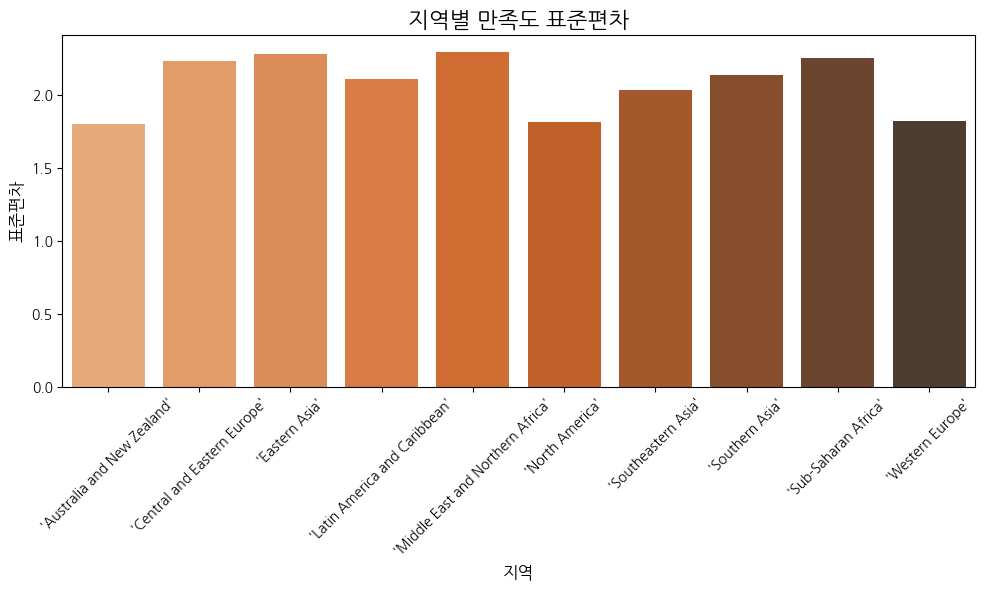

In [18]:
#시각화 평균 만족도 비교

plt.figure(figsize = (10,6))
sns.barplot(data = df_happyscore_region, x = 'region', y = 'std_satisfaction', palette='Oranges_d' )
plt.title('지역별 만족도 표준편차', fontsize = 16)
plt.xlabel('지역', fontsize = 12 )
plt.ylabel('표준편차', fontsize = 12 )
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_779/2801595215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_happyscore, x='region', y='avg_satisfaction', palette='Set3')


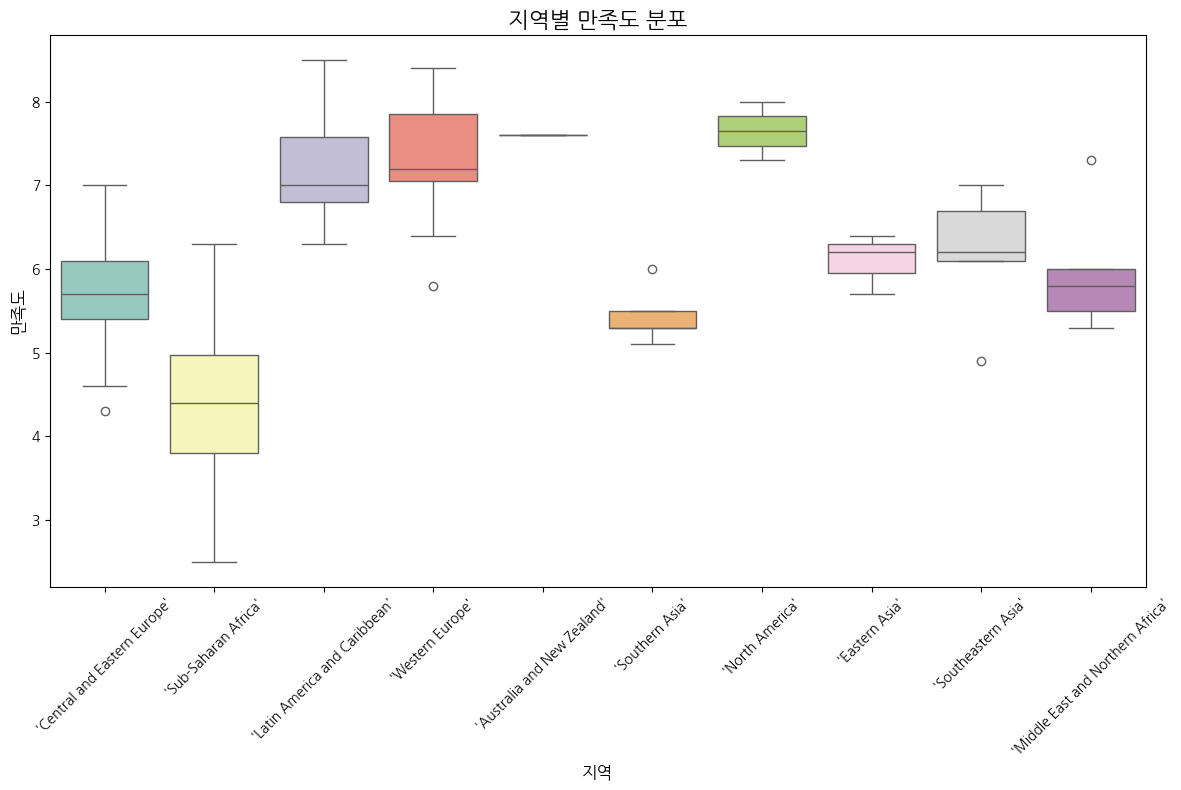

In [19]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df_happyscore, x='region', y='avg_satisfaction', palette='Set3')
plt.title('지역별 만족도 분포', fontsize=16)
plt.xlabel('지역', fontsize = 12)
plt.ylabel('만족도', fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()